# Experimento 3 - Comparação com ReAct com Prompt Enriquecido (Factual Direta)

**Objetivo**: Avaliar se a separação explícita da etapa de personalização, proposta no \textit{PersonaReAct}, resulta em respostas mais organizadas, concisas e claras do que a personalização direta por prompt no ReAct tradicional.

**Metodologia**
* Escolher 4 perfis diferentes
* Escolher 1 pergunta para todos os perfis
  * "Qual jogador percorreu mais metros em alta intensidade?"
  * Para cada perfil, responder a pergunta com o ReAct com Prompt Enriquecido e com o PersonaReAct
* Submeter o par de respostas (com ReAct com Prompt Enriquecido e com o PersonaReAct) à LLM avaliadora.

Critérios de avaliação da LLM:
* Vocabulário Específico Ao Perfil,
* Foco Informacional Adaptado,
* Organizacao Textual Por Perfil,
* Adaptacao Explícita De Linguagem,
* Coerencia Perfil Resposta,
* Sinais Claros De Personalizacao,

Cada critério foi aplicado 20 vezes para cada resposta e uma média foi calculada.

# Importação de bibliotecas

In [59]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Importação dos Resultados

O arquivo de resultados é composto pelas pontuações (scores) geradas pelo G-Eval para cada um dos 7 critérios elaborados.

A pergunta foi feita utilizando o padrão ReAct e o padrão PersonaReAct para cada perfil listado abaixo.

Cada pontuação foi calculada 20 vezes e os seus resultados salvos nas listas ```scores_personareact``` e ```scores_react_prompt```.

## Torcedor

Pergunta: "Qual jogador mais se destacou em termos de distância percorrida e velocidade média no jogo contra o Ceará no dia 1º de abril de 2023?"

Respostas:
*  **ReAct**: *"O jogador que percorreu mais metros em alta intensidade é Kauan."*

*  **PersonaReAct**: *"Se liga, torcedor! O jogador que mais percorreu metros em alta intensidade foi o Kauan, com impressionantes 5.717 metros! Isso mostra que ele tá realmente dando tudo em campo, se esforçando ao máximo. É esse tipo de dedicação que faz a diferença e pode levar nosso time à vitória! Vamos em frente, apoiando sempre! 🏆💪"*


In [60]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_torcedor_factual_direta.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Qual jogador percorreu mais metros em alta int...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,9.85,8.06,1.79
1,Qual jogador percorreu mais metros em alta int...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,9.78,8.04,1.74
2,Qual jogador percorreu mais metros em alta int...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,9.82,8.17,1.65
3,Qual jogador percorreu mais metros em alta int...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,9.90,8.09,1.81
4,Qual jogador percorreu mais metros em alta int...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,9.73,8.14,1.59


In [61]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.91,0.02,8.26,0.06
1,CoerenciaPerfilResposta,9.96,0.01,4.22,0.73
2,FocoInformacionalAdaptado,9.87,0.03,7.61,0.05
3,OrganizacaoTextualPorPerfil,9.65,0.06,7.49,0.24
4,SinaisClarosDePersonalizacao,9.56,0.07,2.56,0.08
5,VocabulárioEspecíficoAoPerfil,9.84,0.05,8.14,0.10


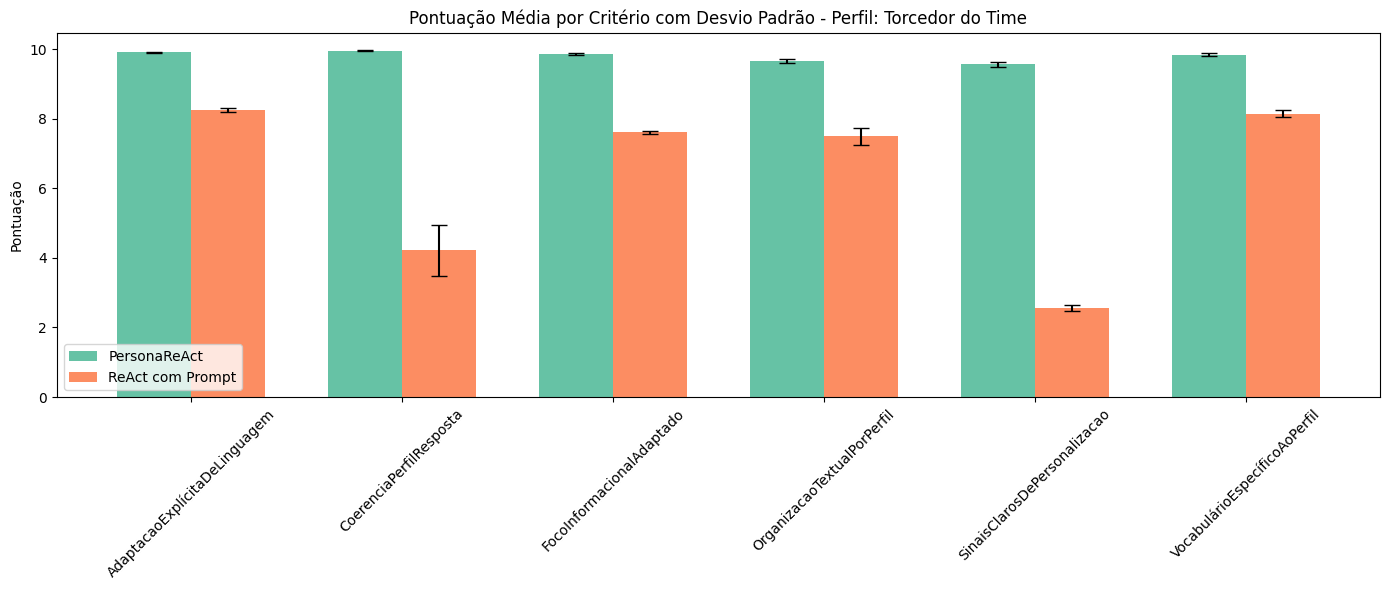

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Torcedor do Time")
ax.legend()
plt.tight_layout()
plt.show()

In [63]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.84,8.14,1.487818e-23,✅
1,FocoInformacionalAdaptado,9.87,7.61,3.772107e-33,✅
2,OrganizacaoTextualPorPerfil,9.65,7.49,6.913123e-20,✅
3,AdaptacaoExplícitaDeLinguagem,9.91,8.26,1.369152e-28,✅
4,CoerenciaPerfilResposta,9.96,4.22,8.346831e-19,✅
5,SinaisClarosDePersonalizacao,9.56,2.56,8.094032e-35,✅


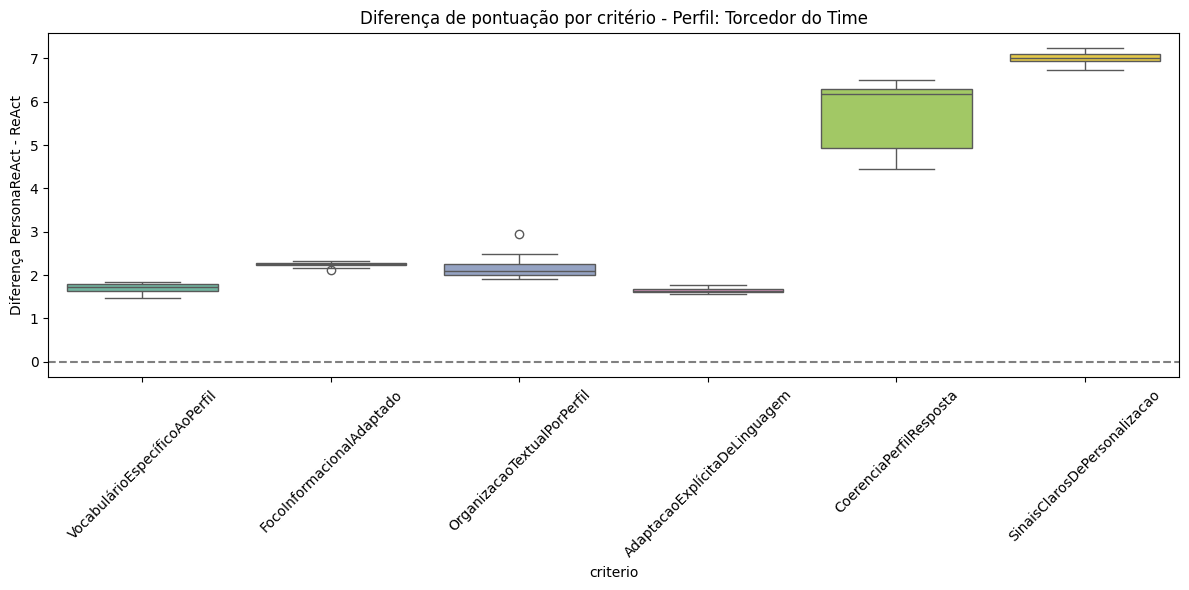

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Torcedor do Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

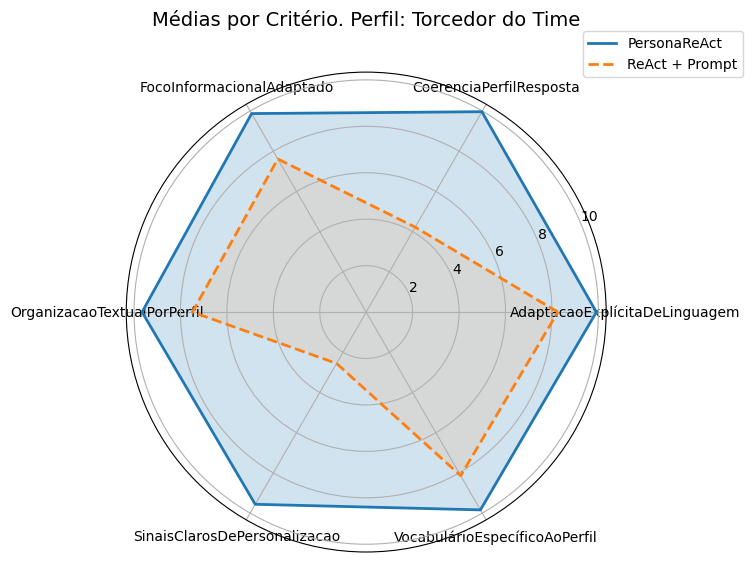

In [65]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Torcedor do Time", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

## Técnico

In [66]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_tecnico_factual_direta.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Qual jogador percorreu mais metros em alta int...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.24,7.76,1.48
1,Qual jogador percorreu mais metros em alta int...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.16,7.81,1.35
2,Qual jogador percorreu mais metros em alta int...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.17,7.81,1.36
3,Qual jogador percorreu mais metros em alta int...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.26,7.80,1.46
4,Qual jogador percorreu mais metros em alta int...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.30,8.08,1.22


In [67]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.54,0.08,8.81,0.03
1,CoerenciaPerfilResposta,9.97,0.01,8.43,0.12
2,FocoInformacionalAdaptado,9.56,0.08,7.94,0.13
3,OrganizacaoTextualPorPerfil,9.03,0.03,7.21,0.25
4,SinaisClarosDePersonalizacao,9.66,0.11,7.99,0.09
5,VocabulárioEspecíficoAoPerfil,9.21,0.05,7.99,0.19


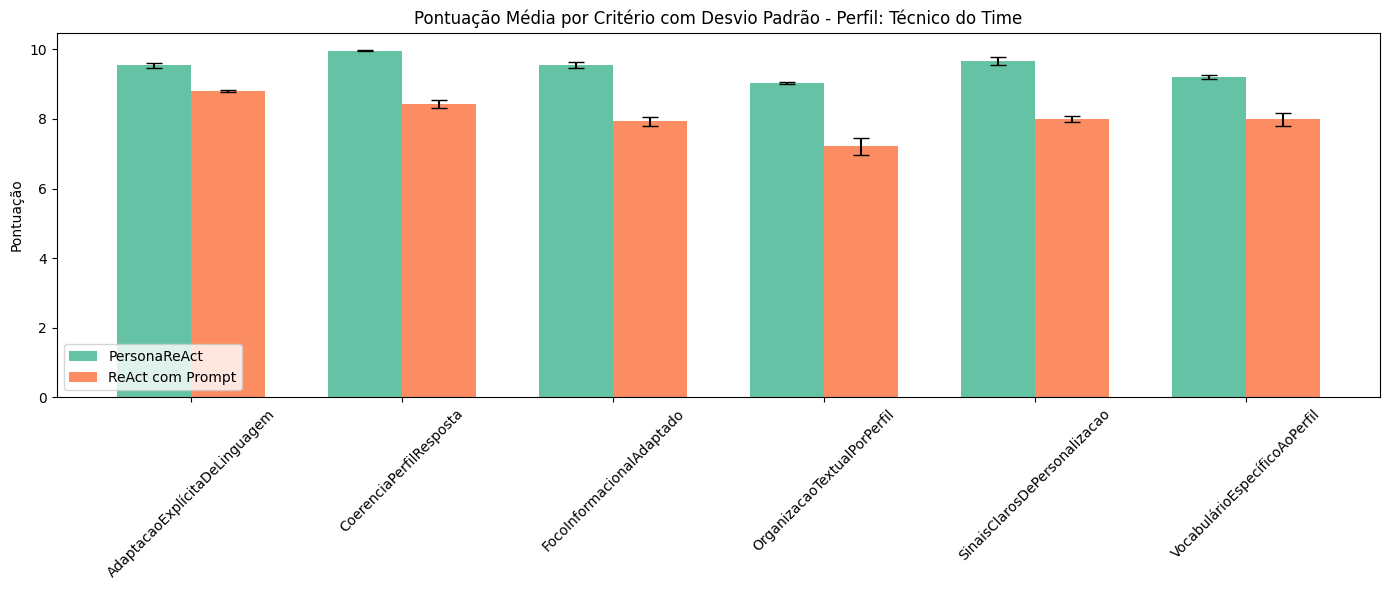

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Técnico do Time")
ax.legend()
plt.tight_layout()
plt.show()

In [69]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.21,7.99,1.097972e-16,✅
1,FocoInformacionalAdaptado,9.56,7.94,2.303577e-21,✅
2,OrganizacaoTextualPorPerfil,9.03,7.21,2.734416e-18,✅
3,AdaptacaoExplícitaDeLinguagem,9.54,8.81,1.708816e-19,✅
4,CoerenciaPerfilResposta,9.97,8.43,1.037395e-22,✅
5,SinaisClarosDePersonalizacao,9.66,7.99,4.928134e-21,✅


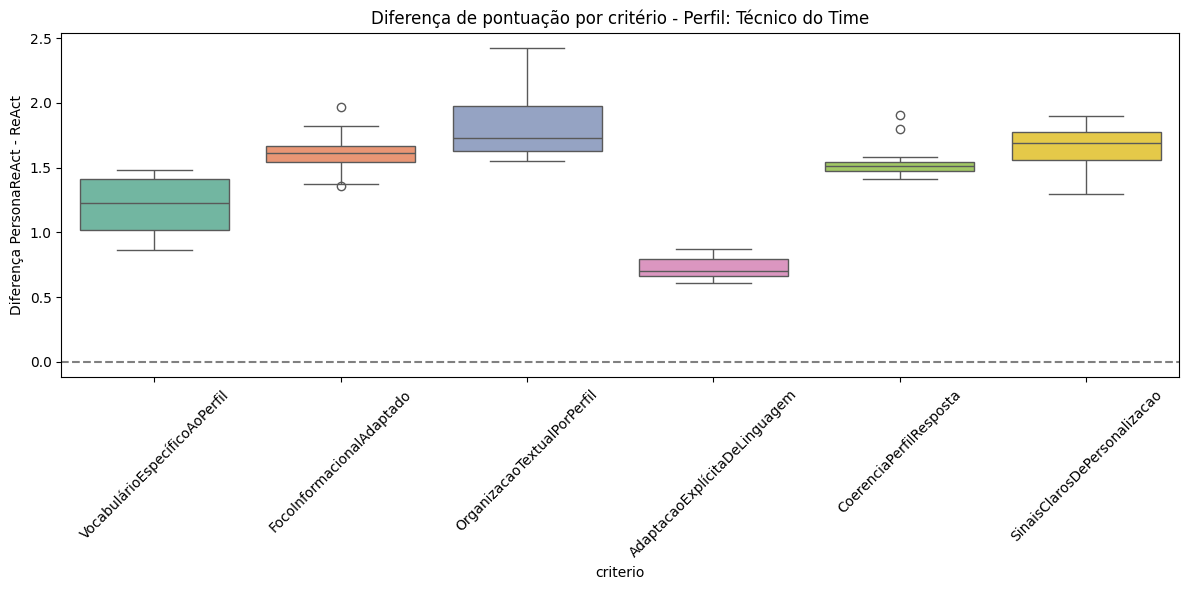

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Técnico do Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

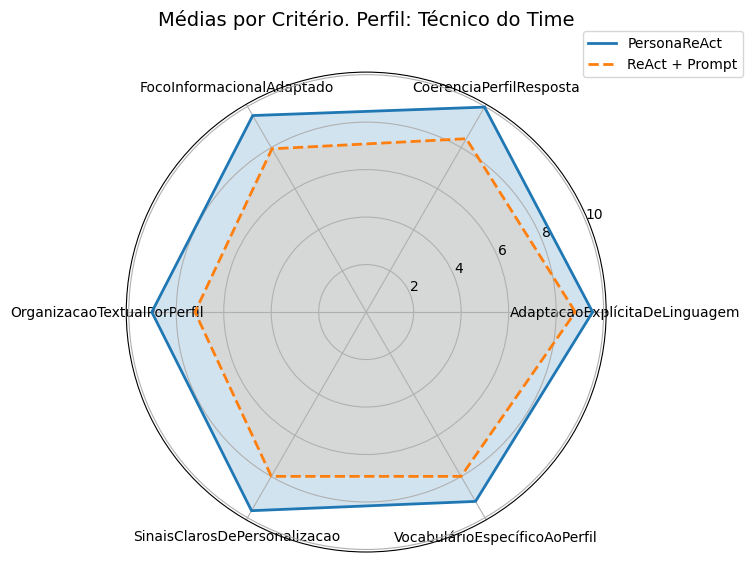

In [71]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Técnico do Time", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

## Reporter Esportivo

In [72]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_reporter_factual_direta.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Qual jogador percorreu mais metros em alta int...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.05,8.65,0.40
1,Qual jogador percorreu mais metros em alta int...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.05,8.65,0.40
2,Qual jogador percorreu mais metros em alta int...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.06,8.63,0.43
3,Qual jogador percorreu mais metros em alta int...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.04,8.62,0.42
4,Qual jogador percorreu mais metros em alta int...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.02,8.65,0.37


In [73]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.31,0.06,9.01,0.03
1,CoerenciaPerfilResposta,9.16,0.04,8.26,0.13
2,FocoInformacionalAdaptado,9.79,0.03,7.89,0.35
3,OrganizacaoTextualPorPerfil,9.14,0.05,8.28,0.11
4,SinaisClarosDePersonalizacao,8.95,0.02,5.94,0.39
5,VocabulárioEspecíficoAoPerfil,9.04,0.02,8.55,0.13


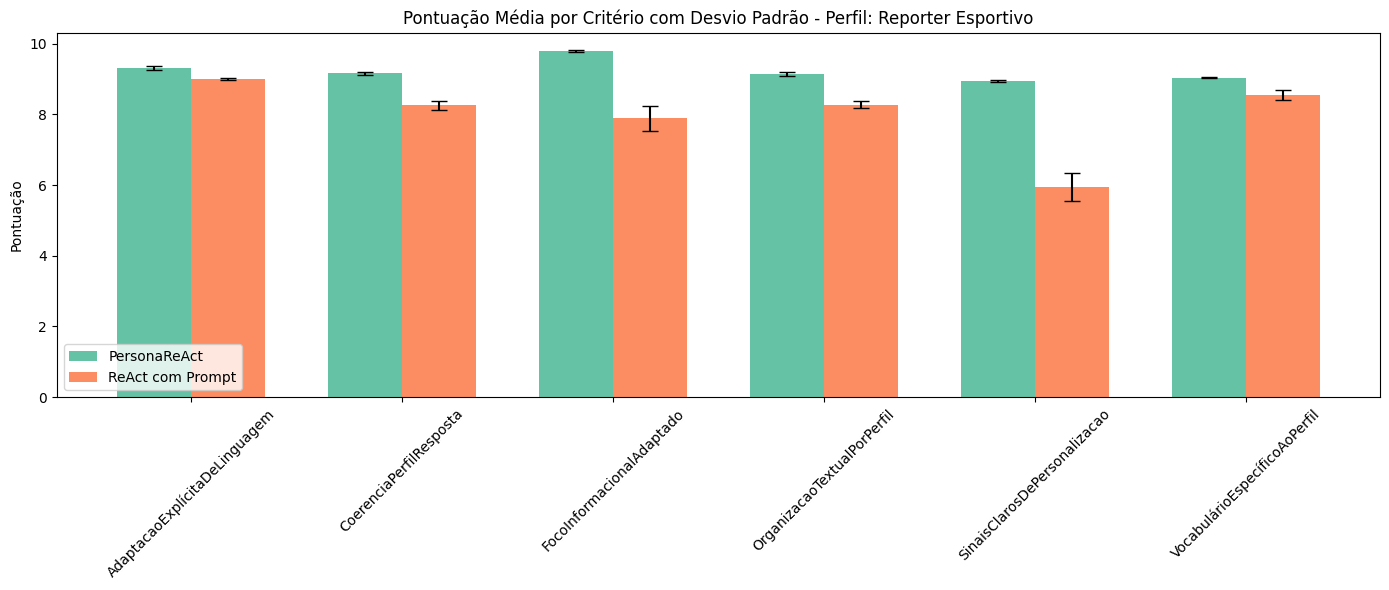

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Reporter Esportivo")
ax.legend()
plt.tight_layout()
plt.show()

In [75]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.04,8.55,5.465809e-13,✅
1,FocoInformacionalAdaptado,9.79,7.89,9.897133e-16,✅
2,OrganizacaoTextualPorPerfil,9.14,8.28,1.753060e-18,✅
3,AdaptacaoExplícitaDeLinguagem,9.31,9.01,3.146978e-14,✅
4,CoerenciaPerfilResposta,9.16,8.26,6.890646e-18,✅
5,SinaisClarosDePersonalizacao,8.95,5.94,1.897906e-18,✅


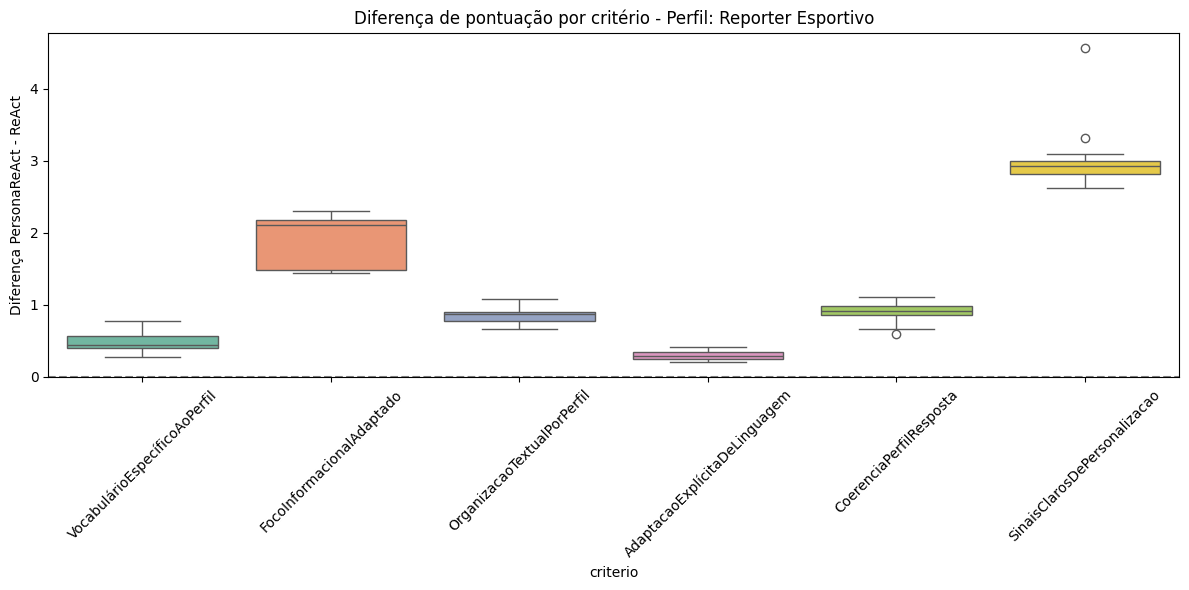

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Reporter Esportivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

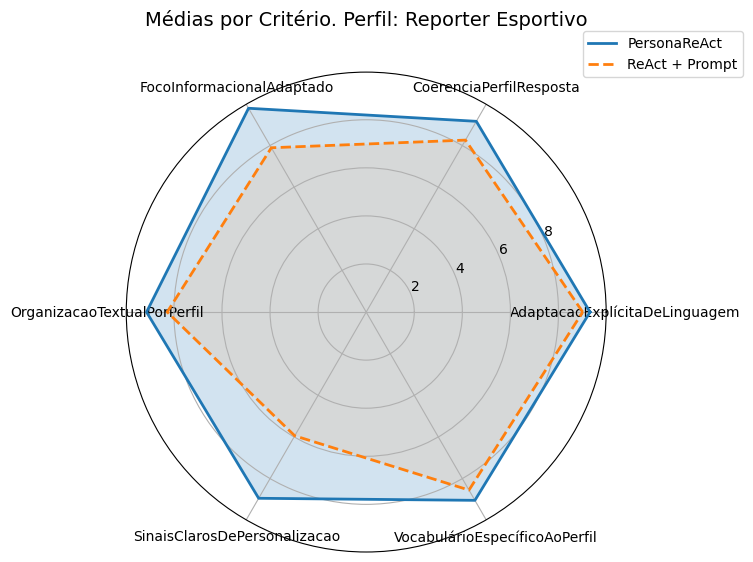

In [77]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Reporter Esportivo", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

## Preparador Físico

In [78]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_preparador_factual_direta.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Qual jogador percorreu mais metros em alta int...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.50,8.85,0.65
1,Qual jogador percorreu mais metros em alta int...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.44,8.86,0.58
2,Qual jogador percorreu mais metros em alta int...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.50,8.81,0.69
3,Qual jogador percorreu mais metros em alta int...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.35,8.78,0.57
4,Qual jogador percorreu mais metros em alta int...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.50,8.79,0.71


In [79]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.68,0.05,9.05,0.06
1,CoerenciaPerfilResposta,9.98,0.01,9.31,0.14
2,FocoInformacionalAdaptado,9.89,0.02,8.24,0.13
3,OrganizacaoTextualPorPerfil,8.85,0.05,6.97,0.70
4,SinaisClarosDePersonalizacao,9.57,0.04,7.46,0.24
5,VocabulárioEspecíficoAoPerfil,9.45,0.06,8.86,0.05


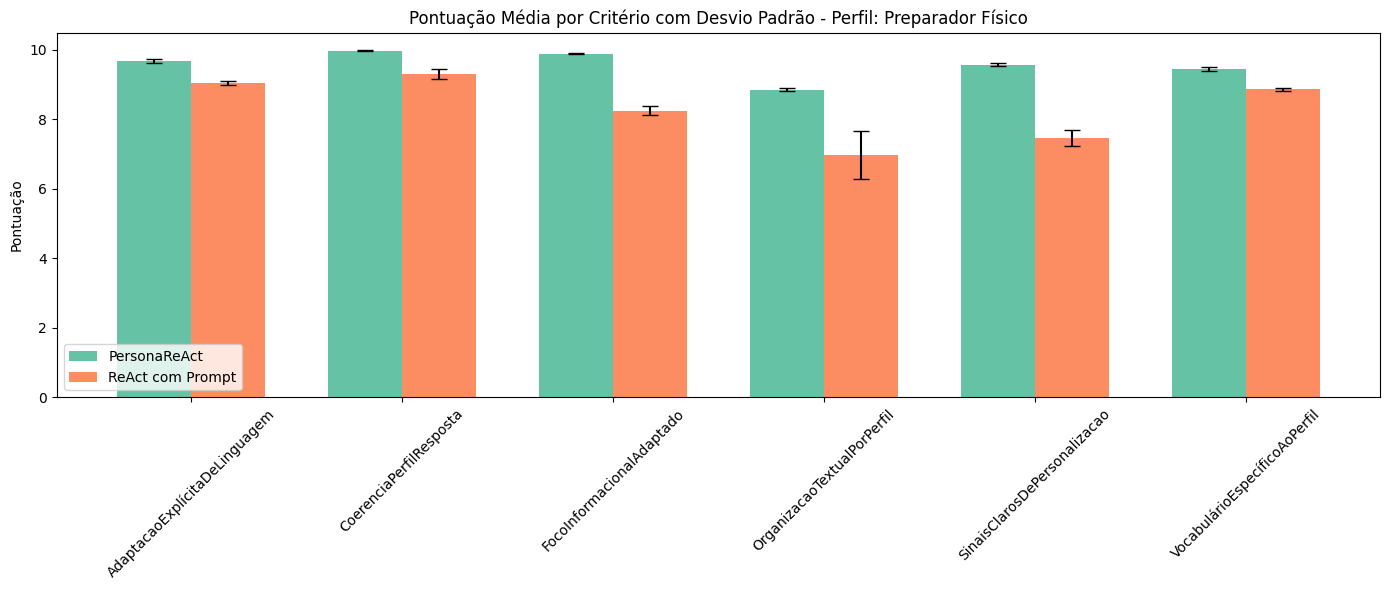

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Preparador Físico")
ax.legend()
plt.tight_layout()
plt.show()

In [81]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.45,8.86,2.143563e-17,✅
1,FocoInformacionalAdaptado,9.89,8.24,1.237064e-22,✅
2,OrganizacaoTextualPorPerfil,8.85,6.97,1.431750e-10,✅
3,AdaptacaoExplícitaDeLinguagem,9.68,9.05,1.867641e-19,✅
4,CoerenciaPerfilResposta,9.98,9.31,6.995458e-15,✅
5,SinaisClarosDePersonalizacao,9.57,7.46,1.987935e-19,✅


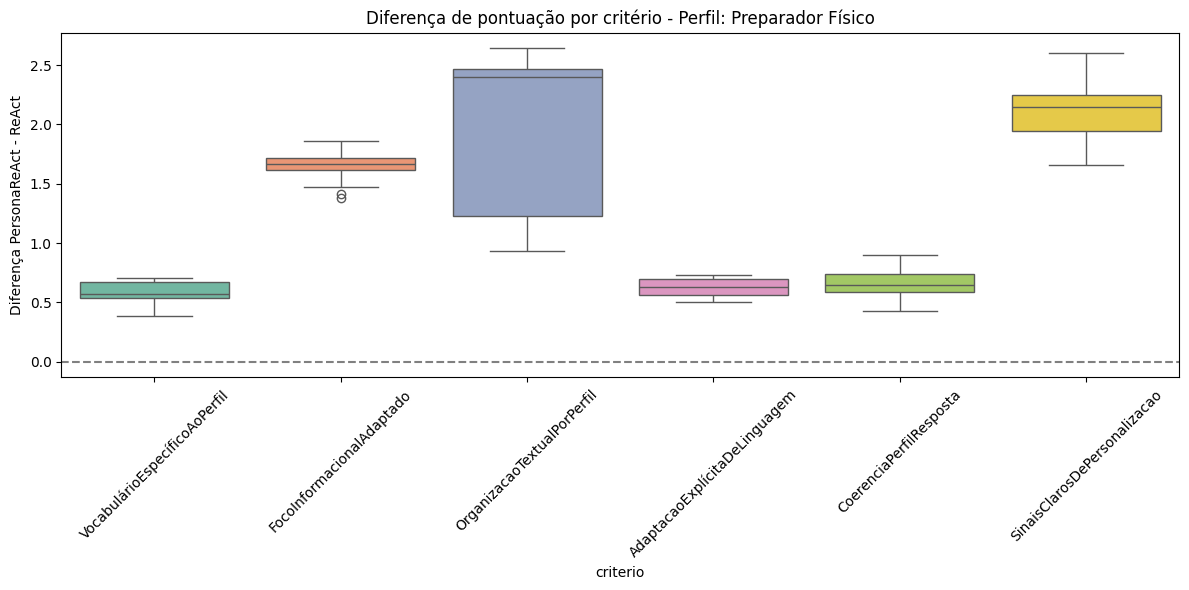

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Preparador Físico")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

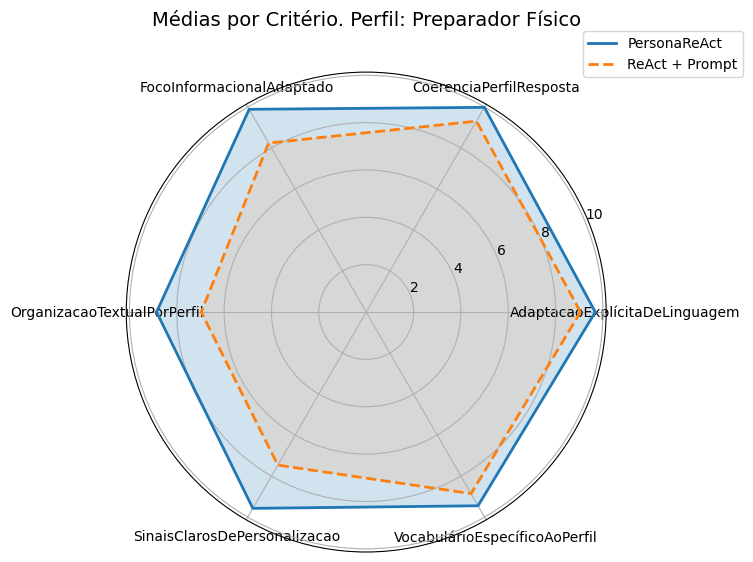

In [83]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Preparador Físico", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

# Narrador Esportivo

Respostas:
*  **ReAct**: *"E o jogador que percorreu mais metros em alta intensidade na última partida foi Kauan, com impressionantes 5.717 metros!"*

*  **PersonaReAct**: *"O jogador que se destacou na partida em termos de desempenho físico foi Kauan, que percorreu impressionantes 5.717 metros em alta intensidade. Essa métrica é crucial para entender não apenas o condicionamento físico do atleta durante o jogo, mas também sua contribuição na criação de jogadas e na recuperação defensiva. Um dado relevante como este não apenas evidencia a eficiência do jogador em campo, mas também reflete a sua capacidade de influenciar o ritmo da partida. Com um desempenho assim, Kauan se consolida como uma peça fundamental no elenco."*

In [108]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_narrador_factual_direta.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Qual jogador percorreu mais metros em alta int...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.05,9.33,-0.28
1,Qual jogador percorreu mais metros em alta int...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.12,9.31,-0.19
2,Qual jogador percorreu mais metros em alta int...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.06,9.33,-0.27
3,Qual jogador percorreu mais metros em alta int...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.10,9.25,-0.15
4,Qual jogador percorreu mais metros em alta int...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.12,9.30,-0.18


In [109]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.35,0.04,9.45,0.07
1,CoerenciaPerfilResposta,8.80,0.09,8.79,0.09
2,FocoInformacionalAdaptado,8.79,0.02,8.92,0.04
3,OrganizacaoTextualPorPerfil,8.96,0.02,8.55,0.09
4,SinaisClarosDePersonalizacao,8.96,0.13,8.17,0.20
5,VocabulárioEspecíficoAoPerfil,9.06,0.05,9.32,0.05


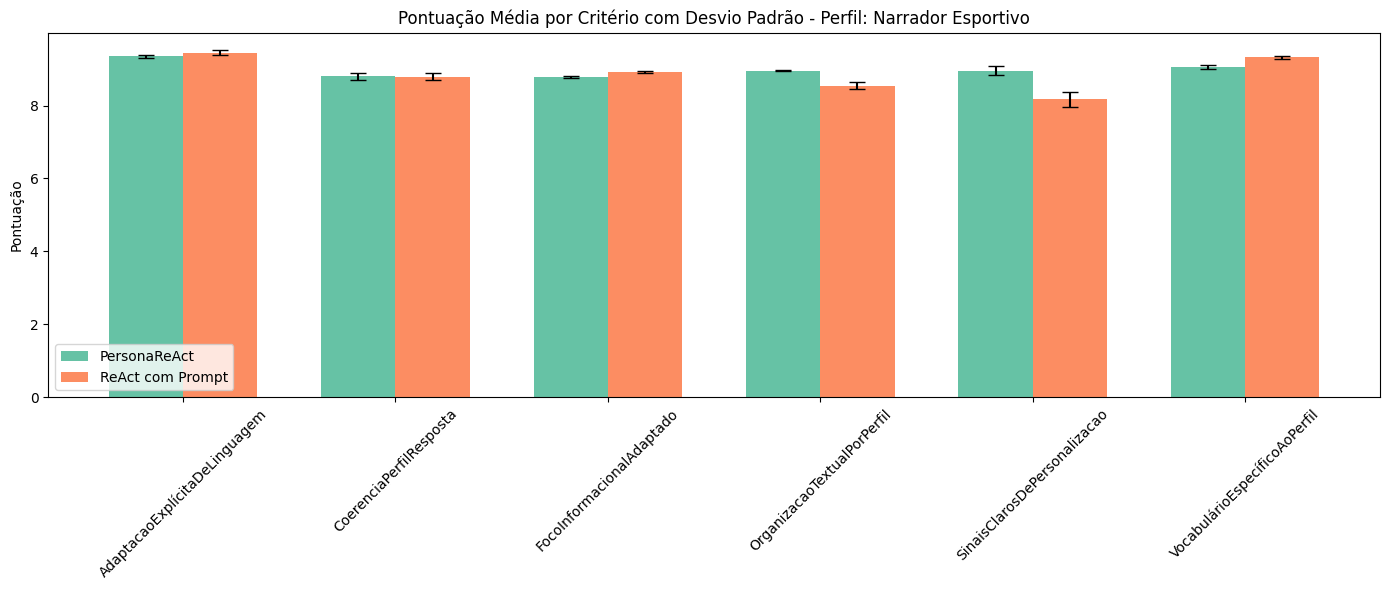

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Narrador Esportivo")
ax.legend()
plt.tight_layout()
plt.show()

In [111]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.06,9.32,7.021248e-13,✅
1,FocoInformacionalAdaptado,8.79,8.92,5.122189e-13,✅
2,OrganizacaoTextualPorPerfil,8.96,8.55,5.349105e-14,✅
3,AdaptacaoExplícitaDeLinguagem,9.35,9.45,5.661614e-06,✅
4,CoerenciaPerfilResposta,8.80,8.79,7.344357e-01,❌
5,SinaisClarosDePersonalizacao,8.96,8.17,2.204719e-11,✅


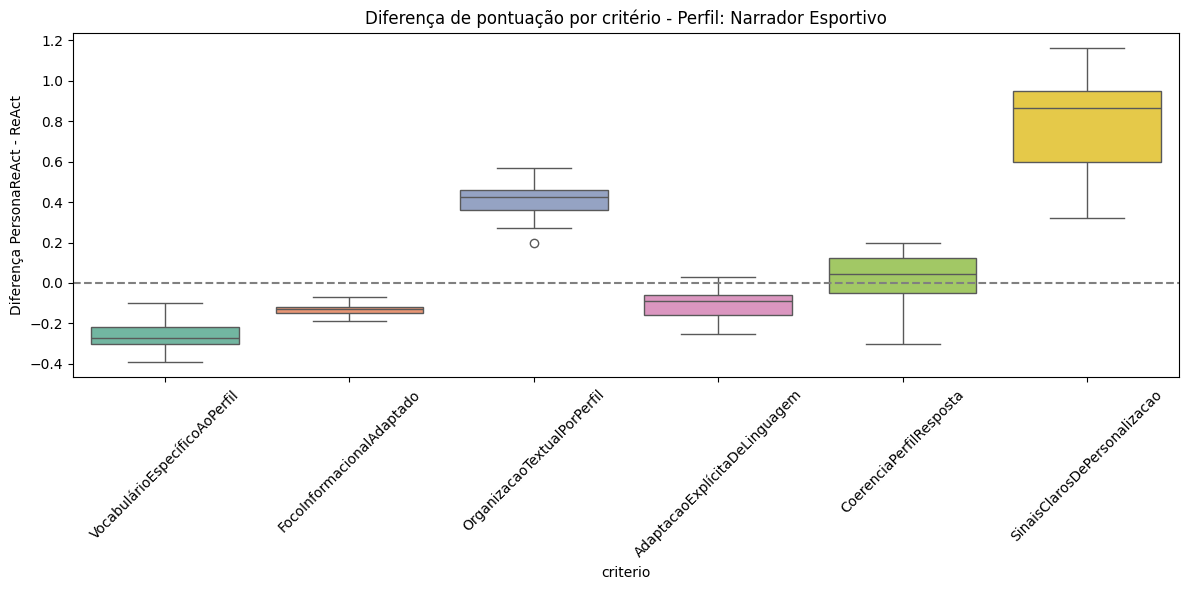

In [112]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Narrador Esportivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

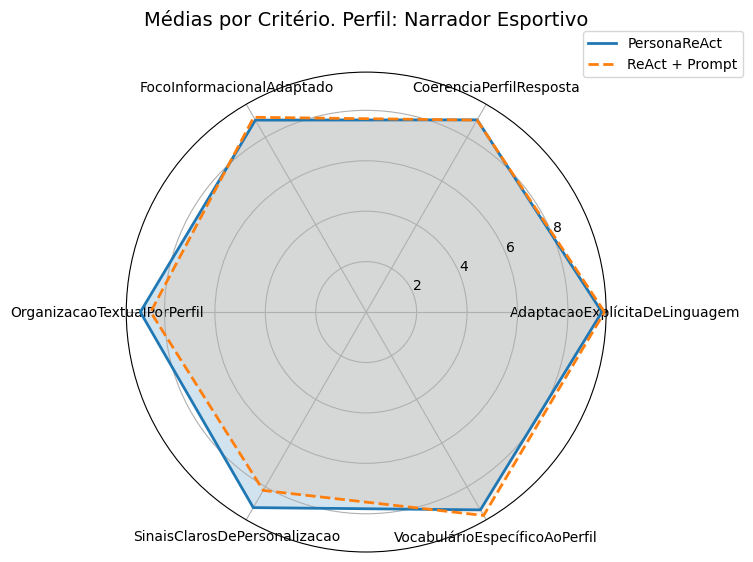

In [113]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Narrador Esportivo", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

# Jornalista Esportivo

In [90]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_jornalista_factual_direta.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Qual jogador percorreu mais metros em alta int...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.16,9.53,-0.37
1,Qual jogador percorreu mais metros em alta int...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.17,9.47,-0.30
2,Qual jogador percorreu mais metros em alta int...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.14,9.47,-0.33
3,Qual jogador percorreu mais metros em alta int...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.15,9.06,0.09
4,Qual jogador percorreu mais metros em alta int...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.24,9.06,0.18


In [91]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.06,0.04,8.34,0.10
1,CoerenciaPerfilResposta,9.55,0.04,9.16,0.18
2,FocoInformacionalAdaptado,9.31,0.07,8.33,0.05
3,OrganizacaoTextualPorPerfil,8.97,0.03,6.64,0.46
4,SinaisClarosDePersonalizacao,8.80,0.04,3.49,0.25
5,VocabulárioEspecíficoAoPerfil,9.22,0.06,9.22,0.20


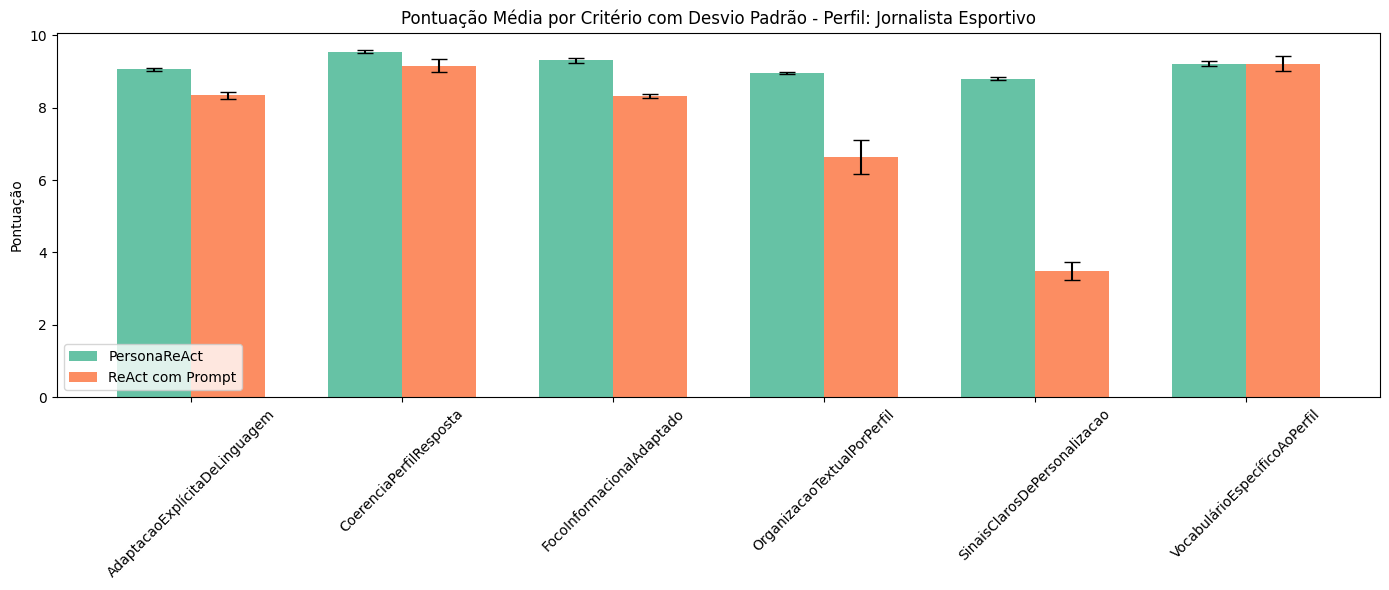

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Jornalista Esportivo")
ax.legend()
plt.tight_layout()
plt.show()

In [93]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.22,9.22,9.845199e-01,❌
1,FocoInformacionalAdaptado,9.31,8.34,3.535676e-22,✅
2,OrganizacaoTextualPorPerfil,8.97,6.64,2.568451e-15,✅
3,AdaptacaoExplícitaDeLinguagem,9.06,8.34,9.848461e-17,✅
4,CoerenciaPerfilResposta,9.55,9.16,1.251593e-08,✅
5,SinaisClarosDePersonalizacao,8.80,3.49,1.137241e-26,✅


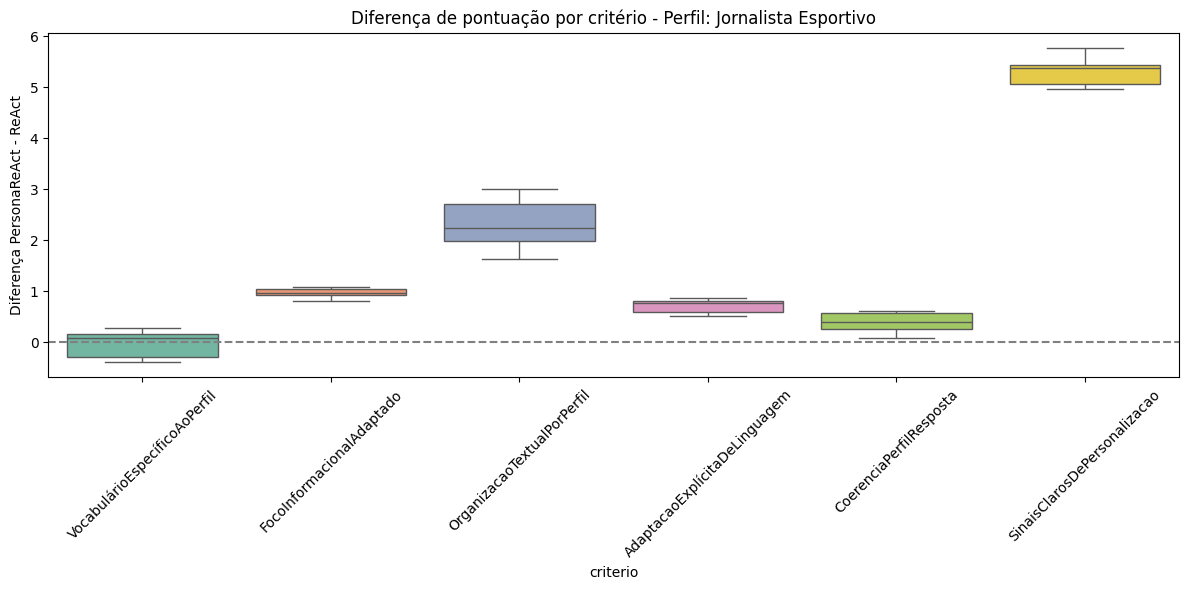

In [94]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Jornalista Esportivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

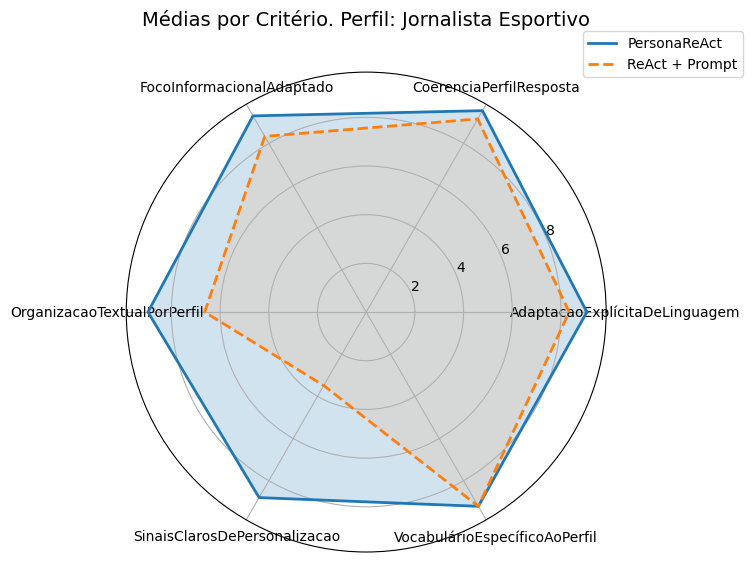

In [95]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Jornalista Esportivo", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

# Influenciador Digital

In [96]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_influenciador_factual_direta.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Qual jogador percorreu mais metros em alta int...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.27,4.46,4.81
1,Qual jogador percorreu mais metros em alta int...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.27,5.16,4.11
2,Qual jogador percorreu mais metros em alta int...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.22,4.24,4.98
3,Qual jogador percorreu mais metros em alta int...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.25,4.89,4.36
4,Qual jogador percorreu mais metros em alta int...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.22,5.15,4.07


In [97]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.36,0.06,3.86,0.24
1,CoerenciaPerfilResposta,9.48,0.03,5.74,0.45
2,FocoInformacionalAdaptado,9.78,0.04,7.29,1.05
3,OrganizacaoTextualPorPerfil,9.47,0.07,8.00,0.09
4,SinaisClarosDePersonalizacao,9.82,0.04,2.37,0.05
5,VocabulárioEspecíficoAoPerfil,9.23,0.03,4.73,0.35


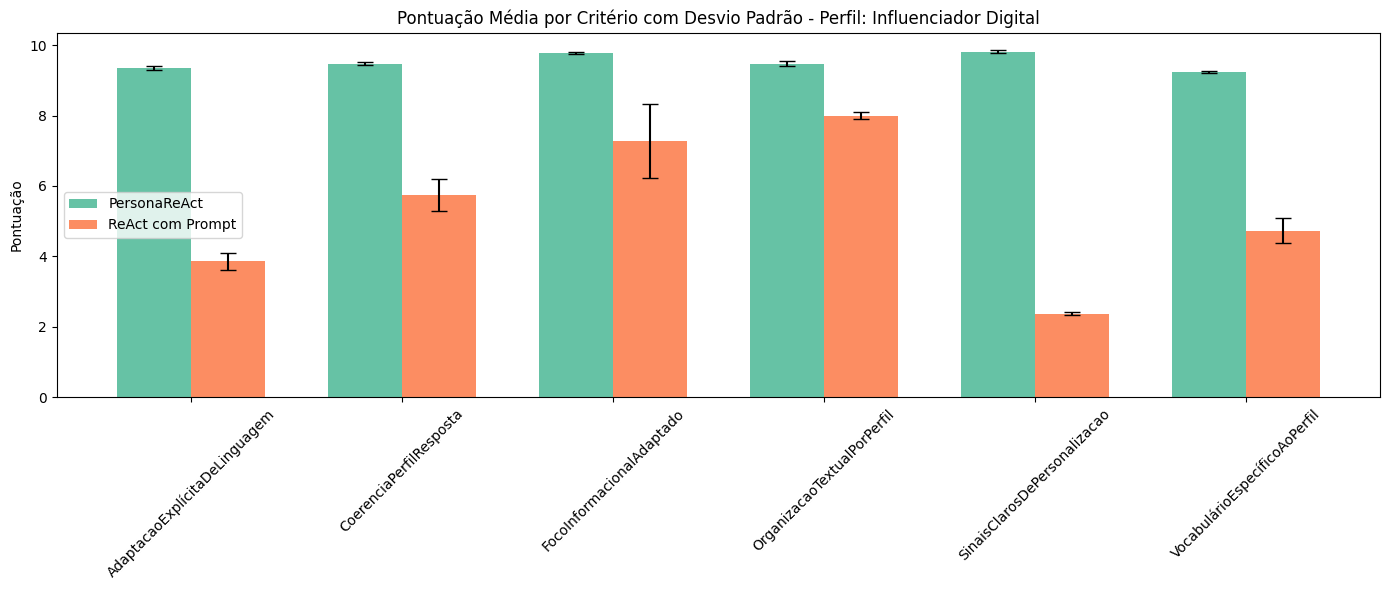

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Influenciador Digital")
ax.legend()
plt.tight_layout()
plt.show()

In [99]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.23,4.73,4.810581e-23,✅
1,FocoInformacionalAdaptado,9.78,7.29,2.385063e-09,✅
2,OrganizacaoTextualPorPerfil,9.47,8.00,5.405763e-22,✅
3,AdaptacaoExplícitaDeLinguagem,9.36,3.86,9.344912e-28,✅
4,CoerenciaPerfilResposta,9.48,5.74,3.371112e-19,✅
5,SinaisClarosDePersonalizacao,9.82,2.37,6.306355e-42,✅


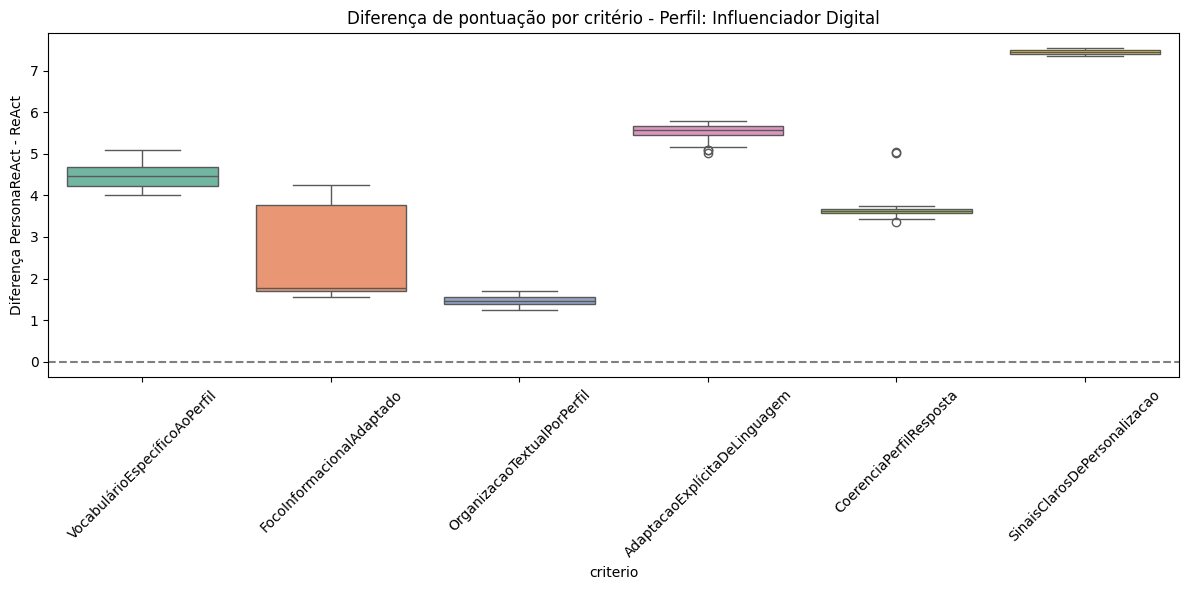

In [100]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Influenciador Digital")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

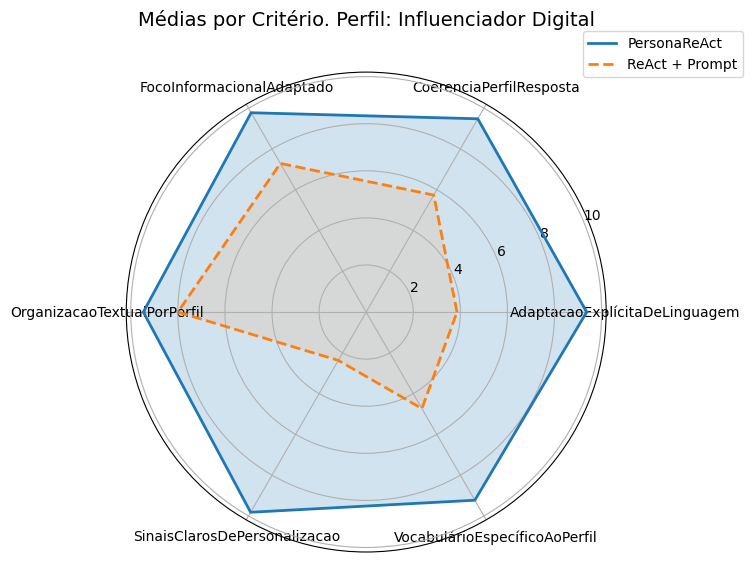

In [101]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Influenciador Digital", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

# Cômico

Respostas:
*  **ReAct**: *"Kauan não só correu mais metros em alta intensidade, como se estivesse fugindo de um cachorro! Ele fez isso em uma média de 0.54 segundos por sprint. Se continuar assim, vai precisar de um GPS para não se perder no campo!"*

*  **PersonaReAct**: *"Você não vai acreditar, mas o corredor imbatível dos gramados é o Kauan! Ele desbravou impressionantes 5.717 metros em alta intensidade! Sim, é quase como dar a volta ao mundo... ou pelo menos ao campo de futebol algumas vezes! Parece que ele estava em uma missão secreta para conquistar todos os zagueiros! Que tal a gente dar um prêmio para ele: 'O Rei da Corrida'? 😂"*

In [114]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_comico_factual_direta.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Qual jogador percorreu mais metros em alta int...,Cômico,VocabulárioEspecíficoAoPerfil,9.85,9.50,0.35
1,Qual jogador percorreu mais metros em alta int...,Cômico,VocabulárioEspecíficoAoPerfil,9.68,9.38,0.30
2,Qual jogador percorreu mais metros em alta int...,Cômico,VocabulárioEspecíficoAoPerfil,9.73,9.30,0.43
3,Qual jogador percorreu mais metros em alta int...,Cômico,VocabulárioEspecíficoAoPerfil,9.73,9.42,0.31
4,Qual jogador percorreu mais metros em alta int...,Cômico,VocabulárioEspecíficoAoPerfil,9.68,9.56,0.12


In [115]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.97,0.00,9.92,0.02
1,CoerenciaPerfilResposta,9.95,0.01,9.83,0.05
2,FocoInformacionalAdaptado,9.69,0.06,9.57,0.06
3,OrganizacaoTextualPorPerfil,9.42,0.06,9.07,0.09
4,SinaisClarosDePersonalizacao,9.07,0.08,9.04,0.05
5,VocabulárioEspecíficoAoPerfil,9.76,0.06,9.42,0.09


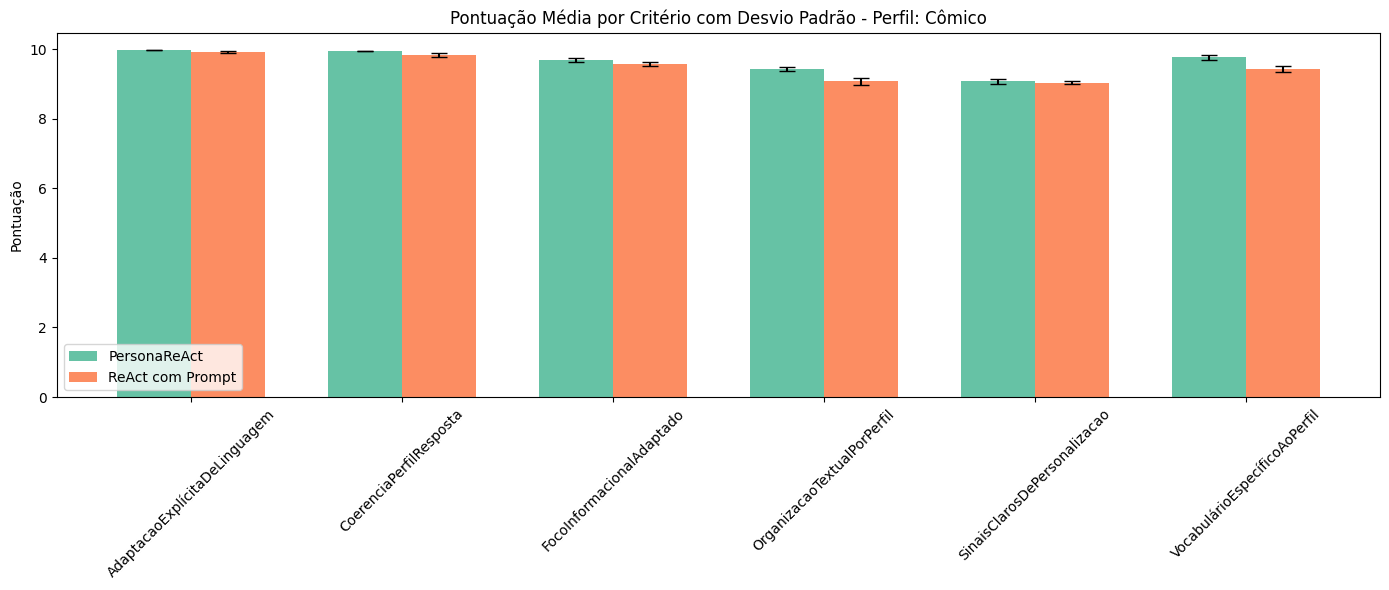

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Cômico")
ax.legend()
plt.tight_layout()
plt.show()

In [117]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.76,9.42,7.385820e-11,✅
1,FocoInformacionalAdaptado,9.69,9.57,5.945080e-07,✅
2,OrganizacaoTextualPorPerfil,9.41,9.08,1.895800e-10,✅
3,AdaptacaoExplícitaDeLinguagem,9.97,9.92,1.333611e-09,✅
4,CoerenciaPerfilResposta,9.95,9.83,6.041173e-10,✅
5,SinaisClarosDePersonalizacao,9.06,9.04,3.047658e-01,❌


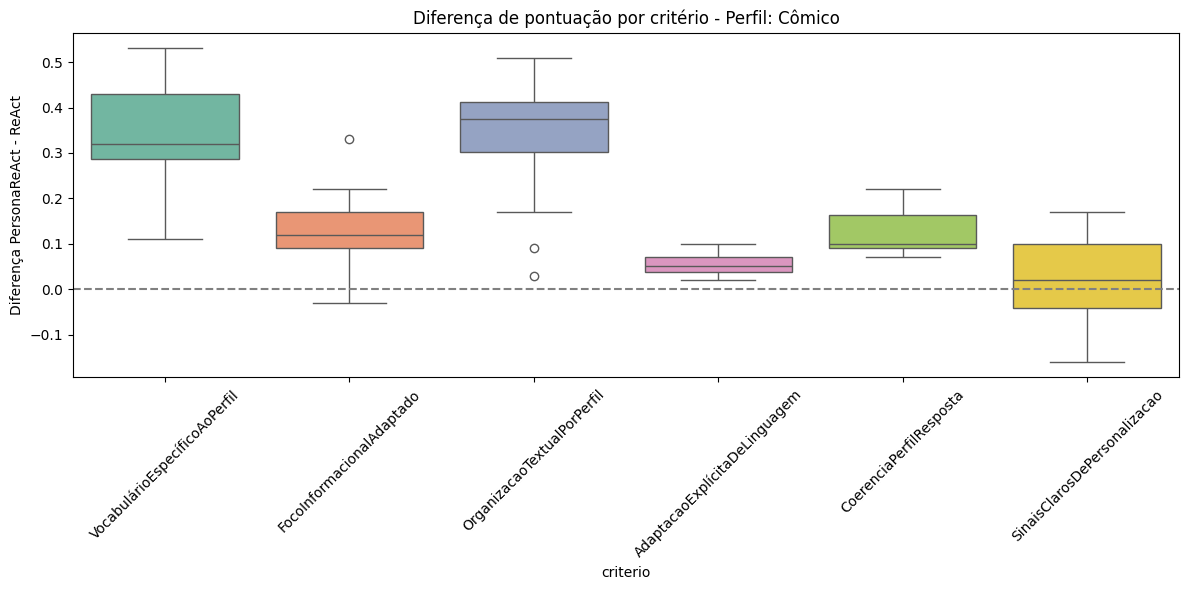

In [118]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Cômico")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

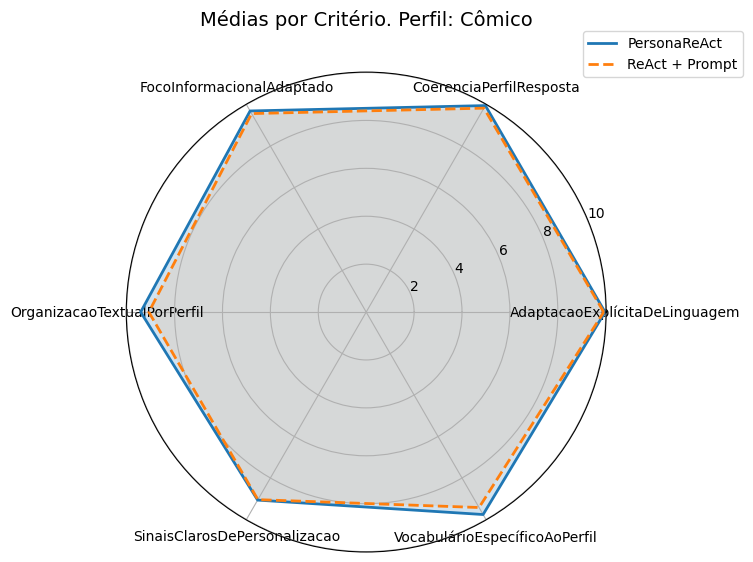

In [119]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Cômico", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()